<a href="https://colab.research.google.com/github/sprucesunday777/sprucesunday777/blob/main/Copy_of_Financial_Inclusion_in_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pyodbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.5/343.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install datasist
import datasist as ds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.1 MB/s eta 0:00:00


In [ ]:

# reading the test dataset to a panda dataframe
# the test dataset
test= pd.read_csv('/content/Test.csv')

In [ ]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


reading the train dataset to a panda dataframe
# the train dataset contains the bank account column and would be used for training the model

In [ ]:
train= pd.read_csv('/content/Train.csv')

In [ ]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
train['ind'] = 1
test['ind'] = 0

# Concatenate train and test DataFrames
df = pd.concat([train, test])

# Output the combined DataFrame
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ind
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,1


In [ ]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ind
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,0
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,0
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0


In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'ind'],
      dtype='object')

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           33610 non-null  object
 5   cellphone_access        33610 non-null  object
 6   household_size          33610 non-null  int64 
 7   age_of_respondent       33610 non-null  int64 
 8   gender_of_respondent    33610 non-null  object
 9   relationship_with_head  33610 non-null  object
 10  marital_status          33610 non-null  object
 11  education_level         33610 non-null  object
 12  job_type                33610 non-null  object
 13  ind                     33610 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 3.8+ MB


In [ ]:
ds.structdata.describe(df)

First five data points


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ind
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,1




Random five data points


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ind
16859,Tanzania,2017,uniqueid_2057,No,Rural,Yes,3,18,Male,Parent,Divorced/Seperated,Primary education,Self employed,1
4532,Kenya,2018,uniqueid_4533,No,Urban,Yes,3,52,Female,Head of Household,Divorced/Seperated,Primary education,Informally employed,1
9927,Rwanda,2016,uniqueid_3860,No,Urban,Yes,1,58,Female,Head of Household,Widowed,Secondary education,Informally employed,1
21858,Uganda,2018,uniqueid_436,No,Rural,Yes,6,46,Female,Spouse,Married/Living together,Primary education,Self employed,1
10142,Rwanda,2016,uniqueid_4075,No,Rural,Yes,3,19,Female,Spouse,Single/Never Married,Primary education,Informally employed,1




Last five data points


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ind
10081,Uganda,2018,uniqueid_2998,NaN,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed,0
10082,Uganda,2018,uniqueid_2999,NaN,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed,0
10083,Uganda,2018,uniqueid_3000,NaN,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income,0
10084,Uganda,2018,uniqueid_3001,NaN,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed,0
10085,Uganda,2018,uniqueid_3002,NaN,Urban,Yes,7,16,Male,Other relative,Single/Never Married,Secondary education,Other Income,0




Shape of  data set: (33610, 14)


Size of  data set: 470540


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
country,object
year,int64
uniqueid,object
bank_account,object
location_type,object
cellphone_access,object
household_size,int64
age_of_respondent,int64
gender_of_respondent,object
relationship_with_head,object




Numerical Features in Data set
['year', 'household_size', 'age_of_respondent', 'ind']


Categorical Features in Data set


['country',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']



Statistical Description of Columns


,year,household_size,age_of_respondent,ind
count,33610.000000,33610.000000,33610.000000,33610.000000
mean,2016.975930,3.791877,38.656114,0.699911
std,0.847353,2.223138,16.447127,0.458303
min,2016.000000,1.000000,16.000000,0.000000
25%,2016.000000,2.000000,26.000000,0.000000
50%,2017.000000,3.000000,35.000000,1.000000
75%,2018.000000,5.000000,49.000000,1.000000
max,2018.000000,21.000000,100.000000,1.000000




Description of Categorical Features


,count,unique,top,freq
country,33610,4,Rwanda,12480
uniqueid,33610,12480,uniqueid_1,4
bank_account,23524,2,No,20212
location_type,33610,2,Rural,20532
cellphone_access,33610,2,Yes,25013
gender_of_respondent,33610,2,Female,19724
relationship_with_head,33610,6,Head of Household,18318
marital_status,33610,5,Married/Living together,15412
education_level,33610,6,Primary education,18270
job_type,33610,10,Self employed,9210




Unique class Count of Categorical features


,Feature,Unique Count
0,country,4
1,uniqueid,12480
2,bank_account,3
3,location_type,2
4,cellphone_access,2
5,gender_of_respondent,2
6,relationship_with_head,6
7,marital_status,5
8,education_level,6
9,job_type,10




Missing Values in Data


,features,missing_counts,missing_percent
0,country,0,0.0
1,year,0,0.0
2,uniqueid,0,0.0
3,bank_account,10086,30.0
4,location_type,0,0.0
5,cellphone_access,0,0.0
6,household_size,0,0.0
7,age_of_respondent,0,0.0
8,gender_of_respondent,0,0.0
9,relationship_with_head,0,0.0


From the description above we can see we had
Shape of  data set: (33610, 14),Size of  data set: 470540 and 30% of our were missing under bank account row

Unique Values in uniqueid is too large to plot




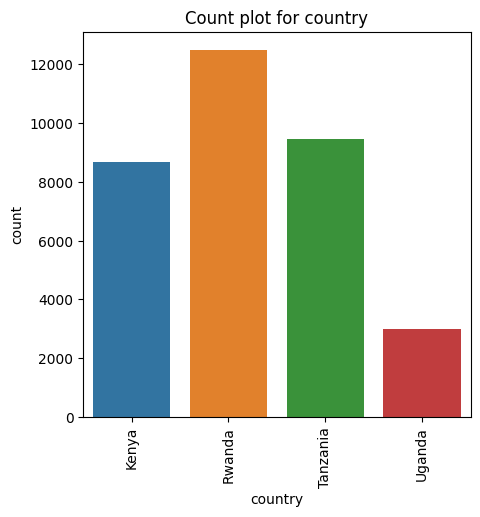

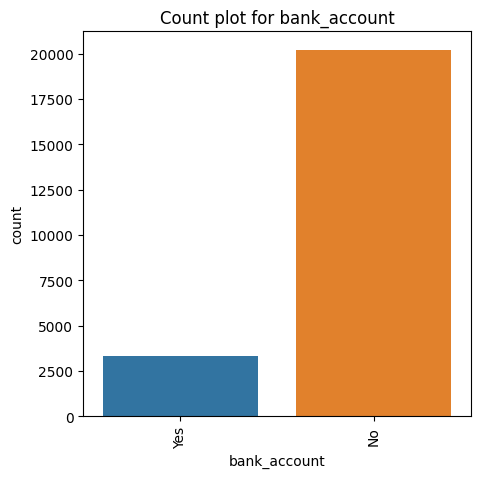

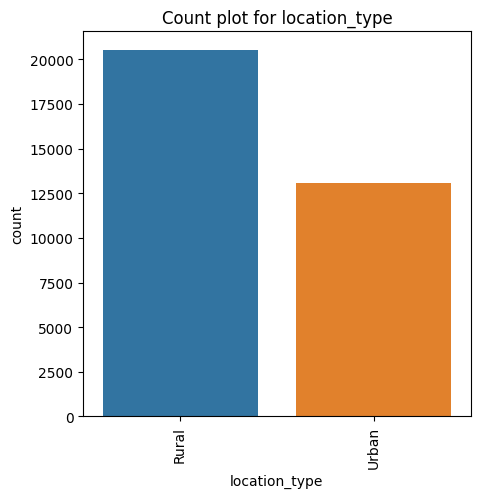

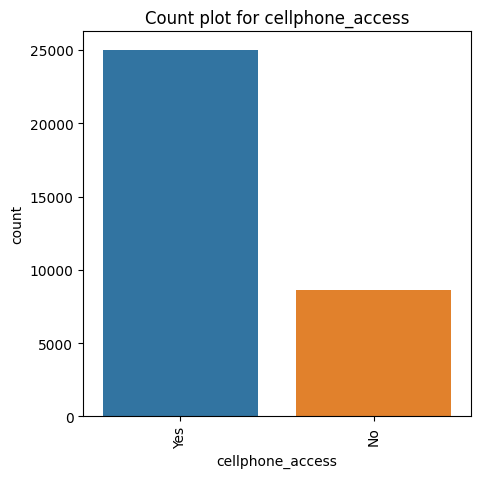

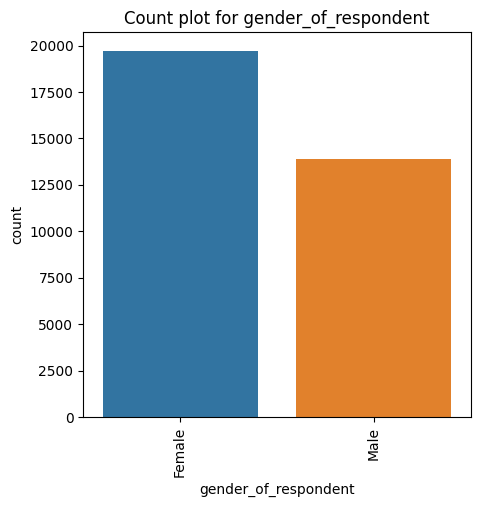

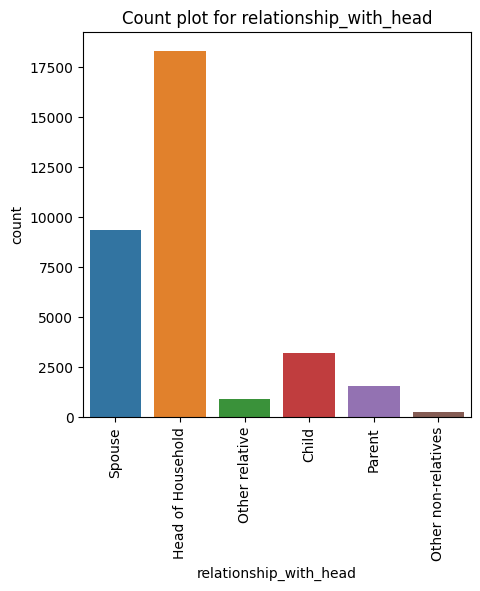

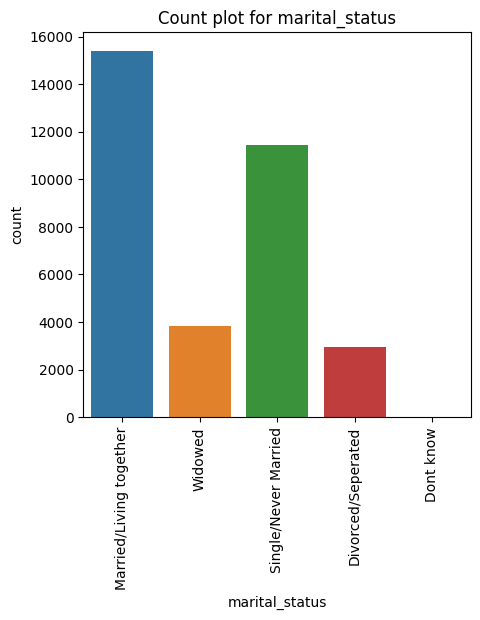

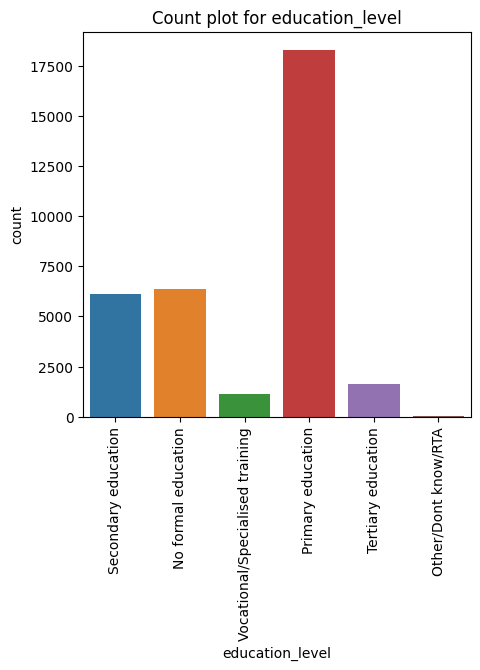

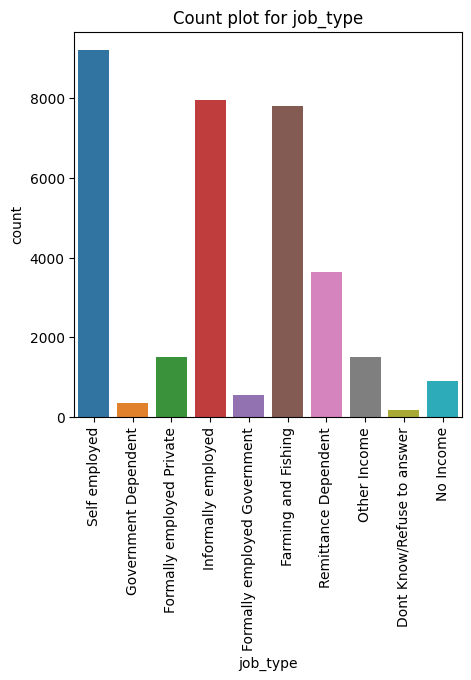

In [ ]:

ds.visualizations.countplot(df)

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'ind'],
      dtype='object')

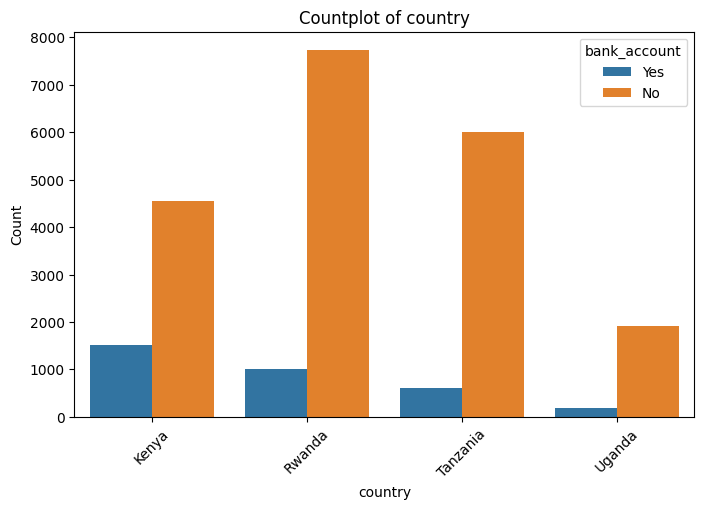

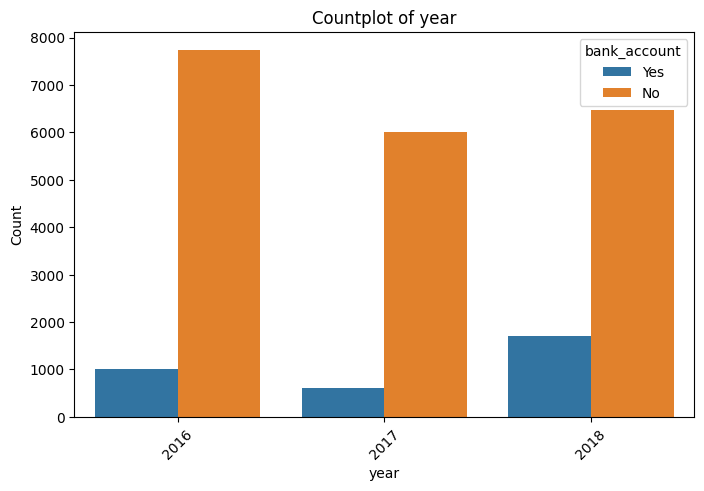

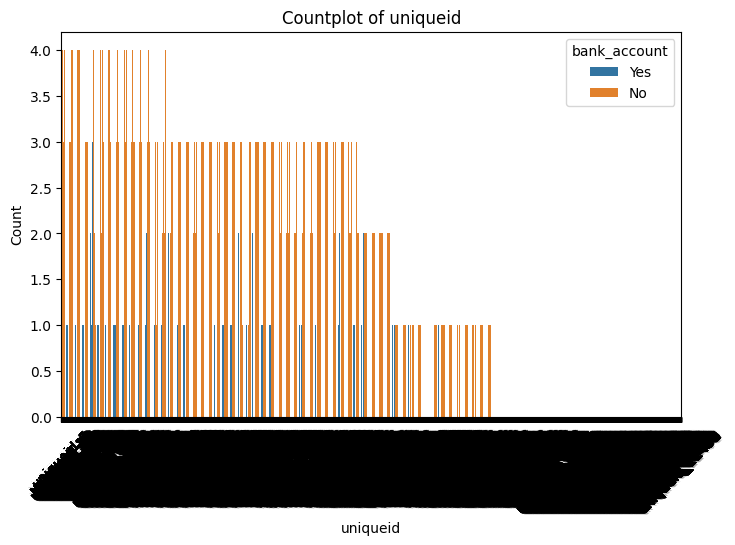

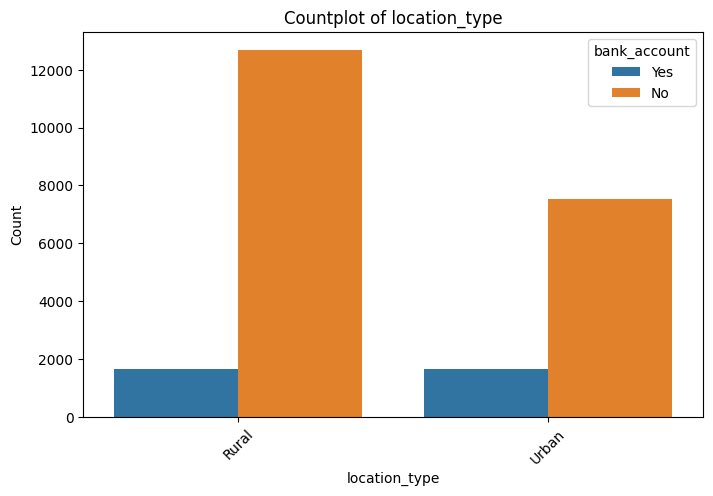

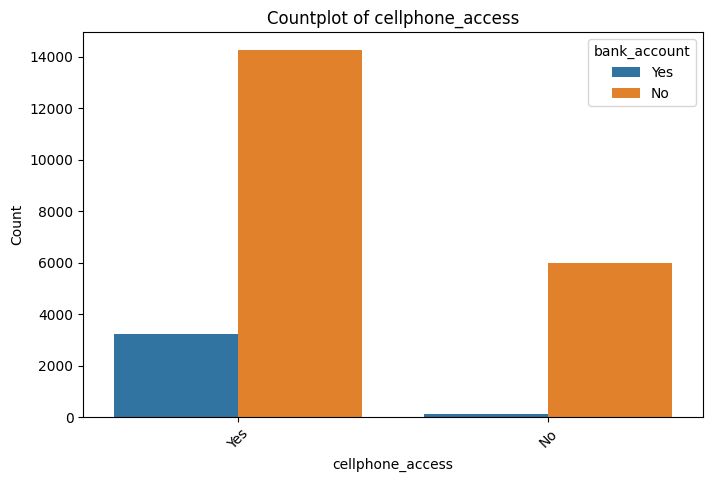

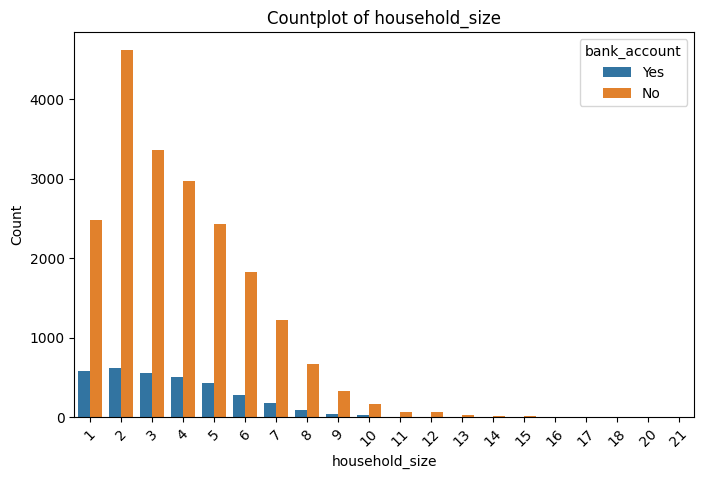

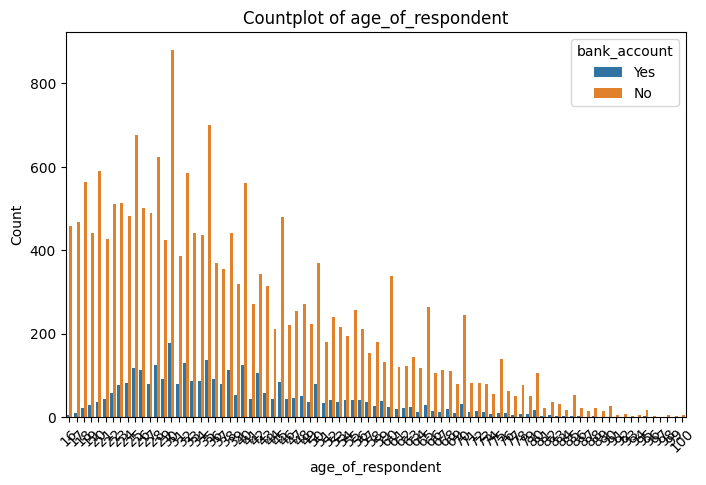

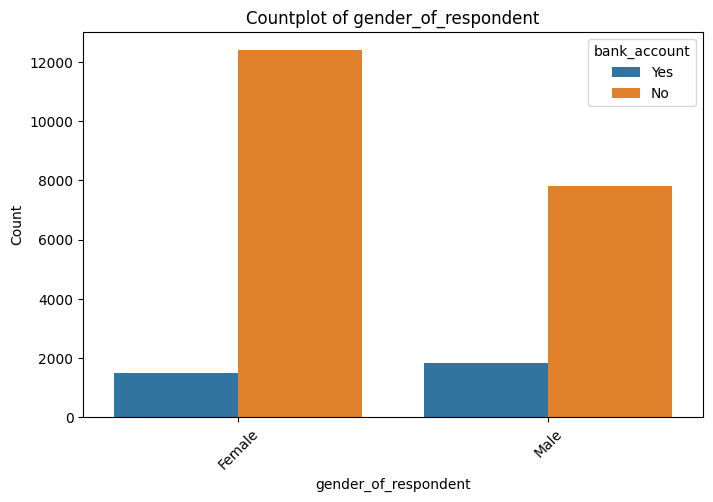

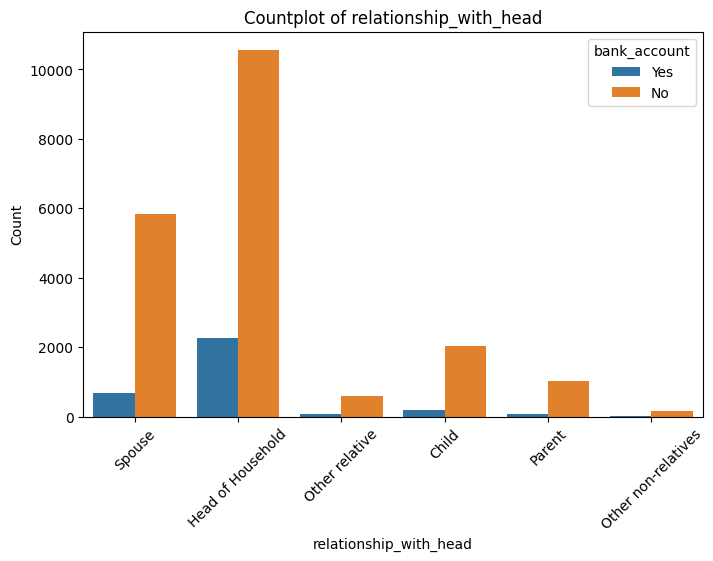

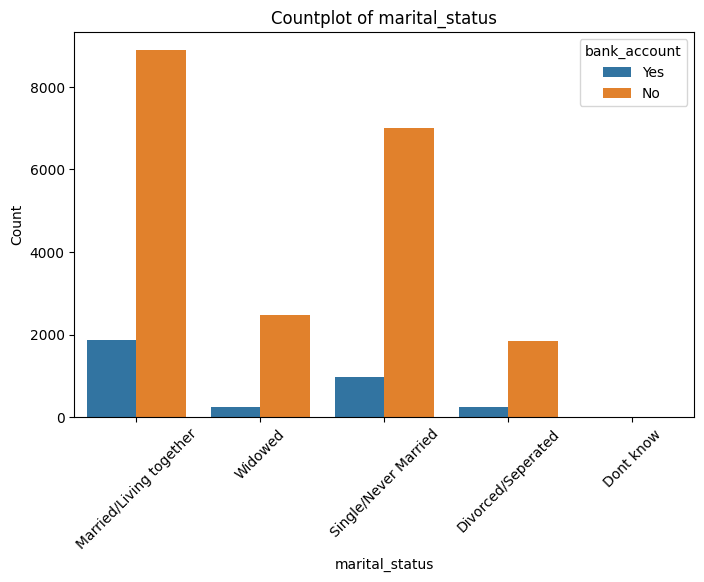

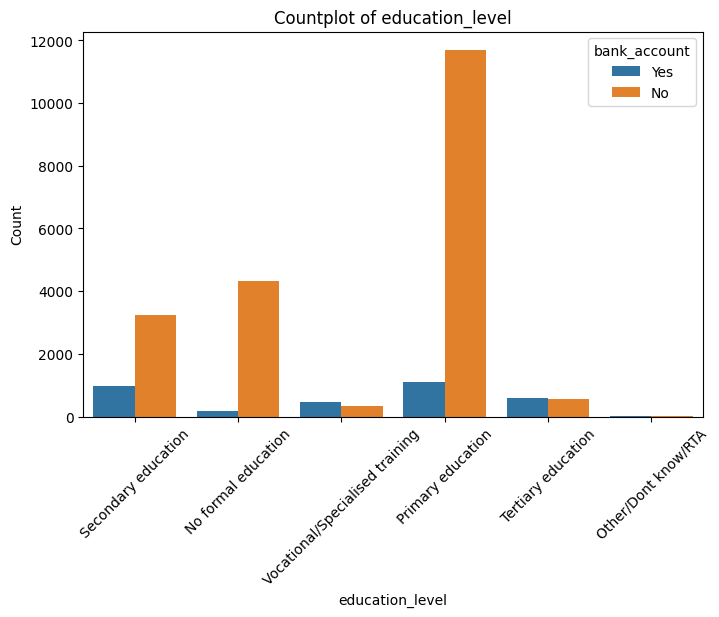

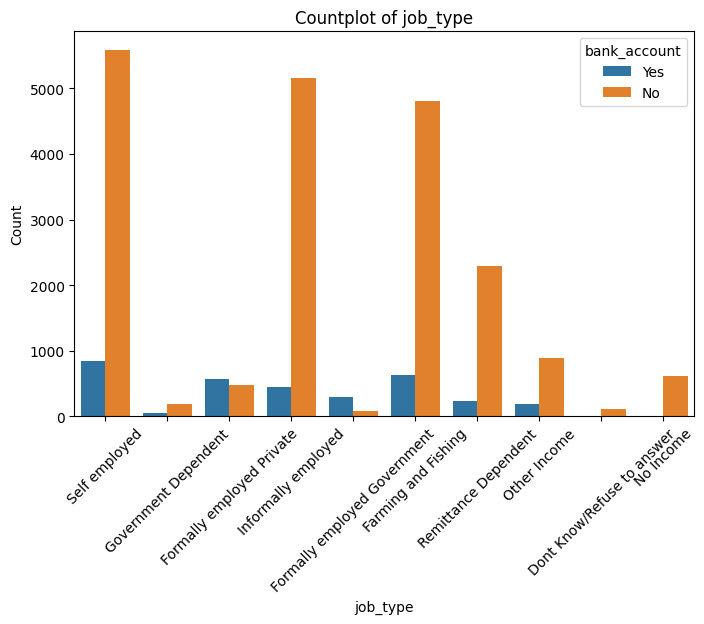

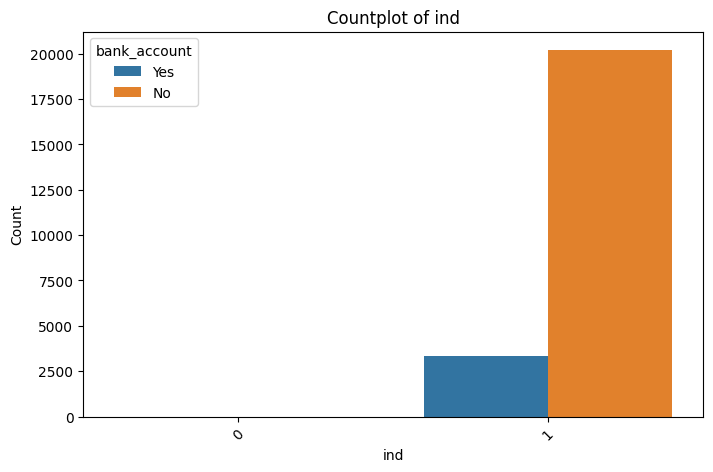

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot countplots for specific columns
def plot_countplots(df, columns_to_plot):
    for column in columns_to_plot:
        plt.figure(figsize=(8, 5))  # Adjust figsize as needed
        sns.countplot(data=df, x=column, hue ='bank_account')
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.show()

# Example usage:
# Assuming 'df' is your DataFrame and 'columns_to_plot' is a list of column names you want to plot
# For example: columns_to_plot = ['column1', 'column2', 'column3', 'column4']
plot_countplots(df, columns_to_plot)

In [ ]:
print(train.columns)
print(test.columns)

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'ind'],
      dtype='object')
Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'ind'],
      dtype='object')


In [ ]:

#dropping of missing data since only 30% was missing
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
ind                       0
dtype: int64

In [ ]:
df.shape

(23524, 14)

In [ ]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'ind'],
      dtype='object')

In [ ]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


In [ ]:

import category_encoders as ce




# Initialize and apply OrdinalEncoder
encoder = ce.OrdinalEncoder([['country', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']])
df1 = encoder.fit_transform(df)

df1.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ind
0,1,2018,1,1,1,1,3,24,1,1,1,1,1,1
1,1,2018,2,2,1,2,5,70,1,2,2,2,2,1
2,1,2018,3,1,2,1,5,26,2,3,3,3,1,1
3,1,2018,4,2,1,1,5,34,1,2,1,4,3,1
4,1,2018,5,2,2,2,8,26,2,4,3,4,4,1


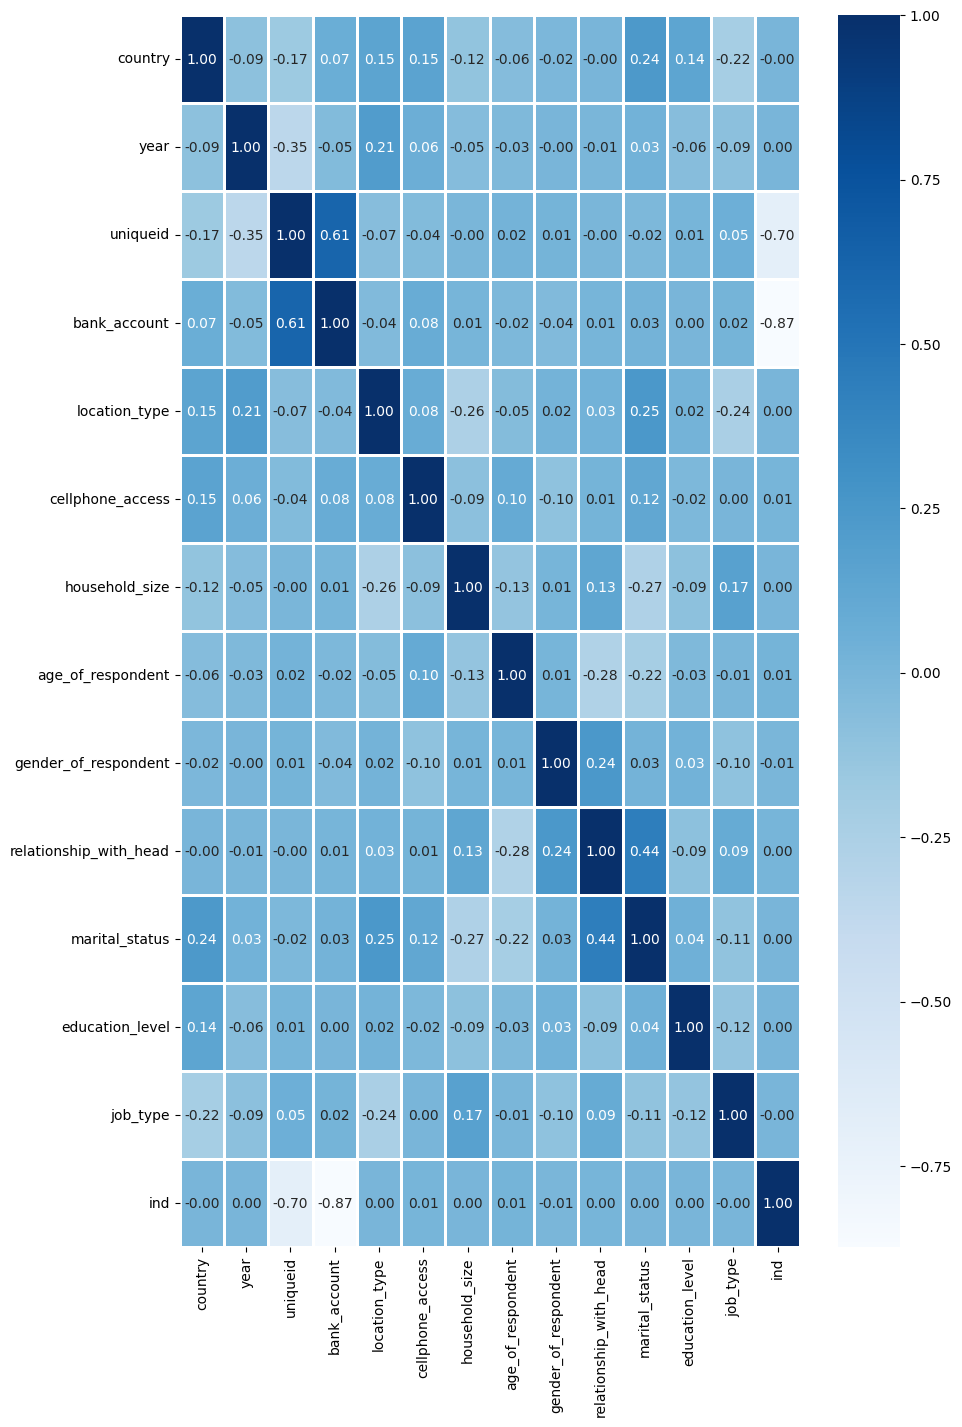

In [ ]:
# to see the correlation among all the variables
plt.figure(figsize=(10, 16))
sns.heatmap(df1.corr(),
            cmap = 'Blues',
            fmt = '.2f',
            linewidths = 2,
            annot = True);

In [ ]:
# splitting the df1 into the train and test dataframes. The train dataframe is to be used for training the model
train =df1[df1.ind == 1]
test = df1[df1.ind == 0]

In [ ]:
test.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ind
0,1,2018,6069,3,2,1,3,30,2,2,1,1,5,0
1,1,2018,6070,3,2,1,7,51,2,2,1,3,3,0
2,1,2018,6071,3,1,2,3,77,1,5,1,2,7,0
3,1,2018,6072,3,1,2,6,39,1,2,1,4,7,0
4,1,2018,6073,3,2,2,3,16,2,4,3,1,7,0


In [ ]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'ind'],
      dtype='object')

In [ ]:
# create the features
features_df = train.drop(columns = ['uniqueid','ind','bank_account'])

# create the target
target_df = train['bank_account']

In [ ]:
# splitting the training dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3,random_state=0)

In [ ]:
! pip install lazypredict

For easy checking of the best model, we use lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train,y_test)

 90%|████████▉ | 26/29 [01:05<00:11,  3.80s/it]

[LightGBM] [Info] Number of positive: 14177, number of negative: 2289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 16466, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.860986 -> initscore=1.823506
[LightGBM] [Info] Start training from score 1.823506


100%|██████████| 29/29 [01:05<00:00,  2.25s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.81,0.69,0.69,0.82,0.11
BaggingClassifier,0.85,0.68,0.68,0.85,0.34
LGBMClassifier,0.89,0.68,0.68,0.87,0.26
ExtraTreeClassifier,0.83,0.67,0.67,0.84,0.04
ExtraTreesClassifier,0.86,0.67,0.67,0.85,1.95
RandomForestClassifier,0.87,0.66,0.66,0.86,1.79
NearestCentroid,0.67,0.66,0.66,0.72,0.09
DecisionTreeClassifier,0.83,0.66,0.66,0.83,0.09
LabelPropagation,0.85,0.66,0.66,0.84,14.16


## LGBMClassifier happens to be the best model for prediction

In [ ]:
from sklearn.metrics import classification_report

In [ ]:

import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Create and train the LGBMClassifier
clf1= lgb.LGBMClassifier()
clf1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_pred,y_test))

[LightGBM] [Info] Number of positive: 14177, number of negative: 2289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 16466, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.860986 -> initscore=1.823506
[LightGBM] [Info] Start training from score 1.823506
Accuracy: 0.8873618588835364
              precision    recall  f1-score   support

           1       0.38      0.71      0.49       544
           2       0.97      0.90      0.94      6514

    accuracy                           0.89      7058
   macro avg       0.68      0.81      0.71      7058
weighted avg       0.93      0.89      0.90      7058



In [ ]:
import lightgbm as lgb


from sklearn.metrics import accuracy_score

# Create and train the LGBMClassifier
LGBM= lgb.LGBMClassifier()

LGBM.fit(X_train, y_train)
Yprediction = LGBM.predict(X_test)
LGBM_accuracy = accuracy_score(y_test,Yprediction)
print("Training accuracy Score : ",LGBM.score(X_train,y_train))
print("Validation accuracy Score : ",LGBM_accuracy )
print(classification_report(Yprediction,y_test))

[LightGBM] [Info] Number of positive: 14177, number of negative: 2289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 16466, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.860986 -> initscore=1.823506
[LightGBM] [Info] Start training from score 1.823506
Training accuracy Score :  0.9033159237216082
Validation accuracy Score :  0.8873618588835364
              precision    recall  f1-score   support

           1       0.38      0.71      0.49       544
           2       0.97      0.90      0.94      6514

    accuracy                           0.89      7058
   macro avg       0.68      0.81      0.71      7058
weighted avg       0.93      0.89      0.90      7058



In [ ]:
# write a function to get the feature importance
def get_feature_importance (models, X_train, y_train):
    # Fit the model on the training data
    LGBM.fit(X_train, y_train)

    # Get feature importances
    feature_importances = pd.Series(LGBM.feature_importances_, index = X_train.columns)

    return feature_importances

In [ ]:
# Check feature importance using the Validated Catboost model
feature_importances = get_feature_importance (LGBM, X_train, y_train)

print("Feature Importance during Model Evaluation:")
print(feature_importances)

[LightGBM] [Info] Number of positive: 14177, number of negative: 2289
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 16466, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.860986 -> initscore=1.823506
[LightGBM] [Info] Start training from score 1.823506
Feature Importance during Model Evaluation:
country                   265
year                       93
location_type             159
cellphone_access           56
household_size            403
age_of_respondent         897
gender_of_respondent      128
relationship_with_head    115
marital_status            116
education_level           364
job_type                  404
dtype: int32


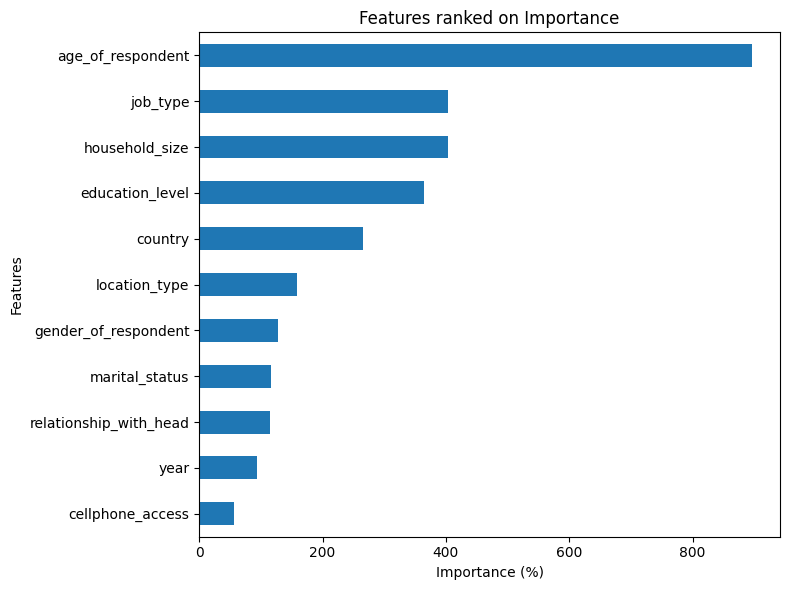

In [ ]:
# convert the feature_importances to a pandas series
importances = pd.Series(feature_importances)
# Plot the feature importances as a bar chart
plt.figure(figsize=(8, 6))
importances.sort_values(ascending= True).plot(kind='barh')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Features ranked on Importance')
plt.tight_layout()
plt.show()

##saving model for deployment

In [ ]:
import pickle

file=open('LGBM.pkl','wb')
pickle.dump(LGBM,file)

##creating new dataframe for ID and bank account

In [ ]:

X_test = test.drop(['uniqueid','ind','year'], axis=1)

# Use the trained model to predict prices for the test dataset
y_pred = clf1.predict(X_test)

y_pred_series = pd.Series(y_pred, name='bank_account', dtype=float)

# Create the predictions DataFrame
predictions_df = pd.DataFrame({'ID': test['uniqueid'], 'bank_account': y_pred_series})

# Display the predictions DataFrame
print(predictions_df)

         ID  bank_account
0      6069          1.00
1      6070          1.00
2      6071          2.00
3      6072          2.00
4      6073          2.00
...     ...           ...
10081  2998          2.00
10082  2999          2.00
10083  3000          2.00
10084  3001          2.00
10085  3002          2.00

[10086 rows x 2 columns]
